#  Census Income Project

In [38]:
from IPython.display import Image
Image(url= "https://cdn-images-1.medium.com/max/720/1*j2EKCyFa0vHr-TqztuS6Vw.jpeg")

## Introduction

**This Income Census is all about analyzing the income of people living is USA.

**Income plays the vital role in person life.

**Higher the income of people better is the standard of living.

**So in short if a country (USA) people income is high than i can say that country is financially stable and that particular country can be considered as devloped country.

**In this project the whole prediction was divided into 2 groups that people who are earning either above $ 50,000  or  less than  $50,000.

**In dataset there are many features such as age, Workclass, Fnlwgt, Education, Education_num, Occupation, Relationship, Race, Sex,Capital_gain, Capital_loss,Hours_per_week,Native_country for predicting the income of people in USA.

In [39]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


**Importing all the necessaries libraries which will help me for model prediction.**

## Loading csv data

****Now I am going to upload or read the files/data-sets using pandas. For this we used read_csv.****

In [40]:
# Reading the dataset

df = pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Loading the the first 5 rows of income census dataset.
#### I can say that most of the columns are categorical in nature.

In [41]:
df.shape

(32560, 15)

**There are altogether 32560 rows and 15 columns in income census dataset.**

In [42]:
# lets find out is there any null value in any columns

pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### In Income Census dataset most of the columns are categorical in nature.
#### All the columns count are equal that 32560 so there is no 'NAN' missing values in dataset.
#### There are 6 integer type columns are 9 object type columns in dataset.

In [43]:
df.drop_duplicates(inplace = True)

In [44]:
df.shape

(32536, 15)

**There is no duplicates value in dataset.**

In [45]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

**Almost all the columns are categorical in nature only Fnlwgt,Capital_gain,Capital_loss,Hours_per_week are continous in nature.**

In [46]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Above statistics data show that their multiple outliers.There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
#### Also, number of rows in each column are same, means there are no null values in the data set.
#### Also, the mean and 50%value of most of the column are same and the STD and mean are having the huge difference.
#### Most of the column statistics data are near to 0 values that need to be replaced by mean and mode.
#### By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

## EDA - Exploratory Data Analysis

### Count Plot

**Income**

In [47]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

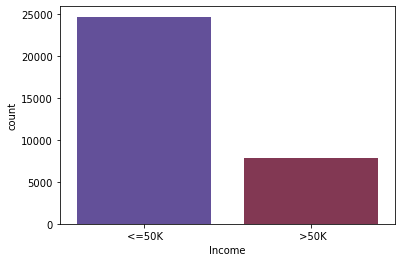

In [48]:
sns.countplot(df['Income'],palette='twilight', data = df);

****There are 24697 people income is more than 50000  and  7839  people income is below  50000.****

****So we can say that dataset is balanced dataset.****

****Moreover large section of people earing is above $50000 which means people have higher standard of living and country is a developed country.****

**Sex**

In [49]:
df['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

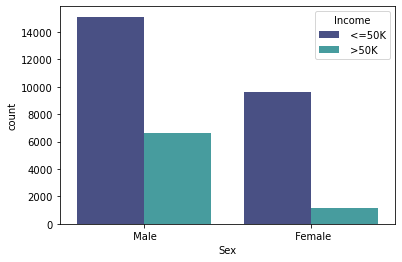

In [50]:
sns.countplot(df['Sex'], palette = 'mako', hue = 'Income', data = df);

#### There are 21774 males employed and 10762 females employed in dataset. 
#### When it comes to income males have more numbers in terms of earning above $50000 than female.

**Race**

In [51]:
df['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

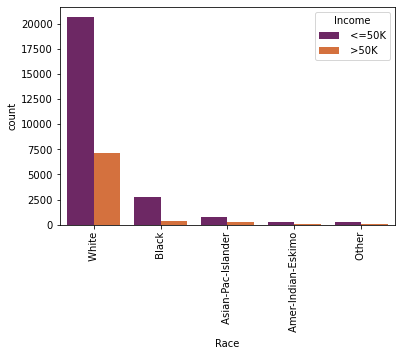

In [52]:
sns.countplot(df['Race'],palette='inferno',hue='Income',data=df);
plt.xticks(rotation=90)

#### The above graph gives me the clear idea that white people earning above $50000 is more than other community. 
#### Might be the while people population is high is USA that why they are securing better and high paid jobs.

**Relationship**

In [53]:
df['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

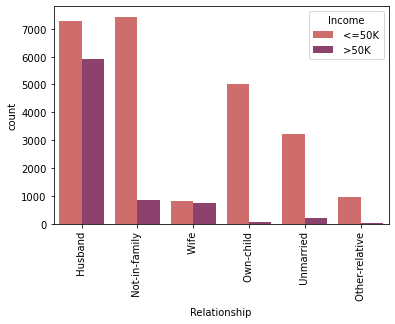

In [54]:
sns.countplot(df['Relationship'],palette='flare',hue='Income',data=df);
plt.xticks(rotation=90)

#### The above graph gives me the clear idea that those people who don't have family there earning is above $50000. 
#### This can give me an idea that bachelors are more career oriented. 
#### They have less distraction so they imporove there skill to get better high paid jobs.

**Occupation**

In [55]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [56]:
# repalcing the values with mode
df['Occupation'] = df['Occupation'].str.replace('?','Prof-specialty')

#### There were '?' in few rows in occupation dataset that was replaced with the help of mode.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

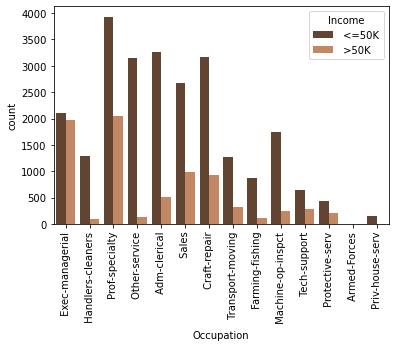

In [57]:
sns.countplot(df['Occupation'],palette='copper',hue='Income',data=df);
plt.xticks(rotation=90)

#### Occupation play the vital role in determining the income of person. 
#### In this dataset Prof-specialty occupation people are earning above $50000 and Armed-Forces people are earning is least as compared to other profession.

**Marital_status**

In [58]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

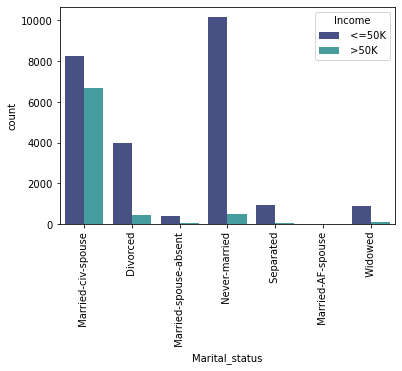

In [59]:
sns.countplot(df['Marital_status'],palette='mako',hue='Income',data=df);
plt.xticks(rotation=90)

****From the above plot I can observe that People who are 'Never-married' are the ones who are earning more than $50K which gives me an idea thar Un-married peoples have Less Responsibility, so they can give more time to their career which Leads them high income.****

**Workclass**

In [60]:
df['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [61]:
# repalcing the values with mode
df['Workclass'] = df['Workclass'].str.replace('?','Private')

****From the WorkClass Column ther are few missing ("?") data which is replaced by the Private attribute.****

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

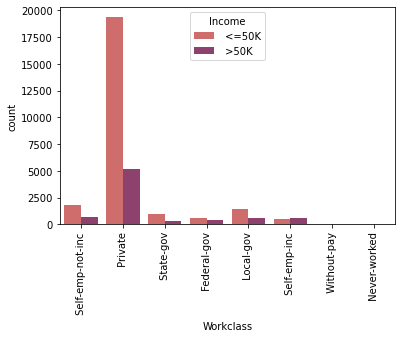

In [62]:
sns.countplot(df['Workclass'],palette='flare',hue='Income',data=df);
plt.xticks(rotation=90)

***From the above count Plot i can say that People who are working in Private Institutions there income is comparitively higher than other income source.***
***Moreover i can say that People prefer private companies for higher source of income.***

****Native_country****

In [63]:
df['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [64]:
df['Native_country']=df['Native_country'].str.replace('?','United-States')

***From the Native_country Column ther are few missing ("?") data which is replaced by the 'United-States' attribute .***

In [65]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


****After removing missing values '?' from the dataset now I will Proceed with Label Encoder.****

## Label Encoder

In [66]:
le = LabelEncoder()
df.Workclass = le.fit_transform(df.Workclass)
df.Education = le.fit_transform(df.Education)
df.Marital_status = le.fit_transform(df.Marital_status)
df.Occupation = le.fit_transform(df.Occupation)
df.Relationship = le.fit_transform(df.Relationship)
df.Race = le.fit_transform(df.Race)
df.Sex = le.fit_transform(df.Sex)
df.Native_country = le.fit_transform(df.Native_country)
df.Income = le.fit_transform(df.Income)

In [67]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [68]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.094357,1.897843e+05,10.297547,10.081725,2.611384,6.139476,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.419136,0.240933
std,13.638193,1.107449,1.055563e+05,3.870195,2.571622,1.506304,3.973089,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,6.053903,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.369932e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


****After Applying  Label Encoder i have converted all the strings columns into integer.****

****From the describe code i can say that there are few zero values in this dataset which i will replace soon.****

****Now I can see that there are few outliers in the dataset which I will rectify with zscore.****

## Distribution Plot

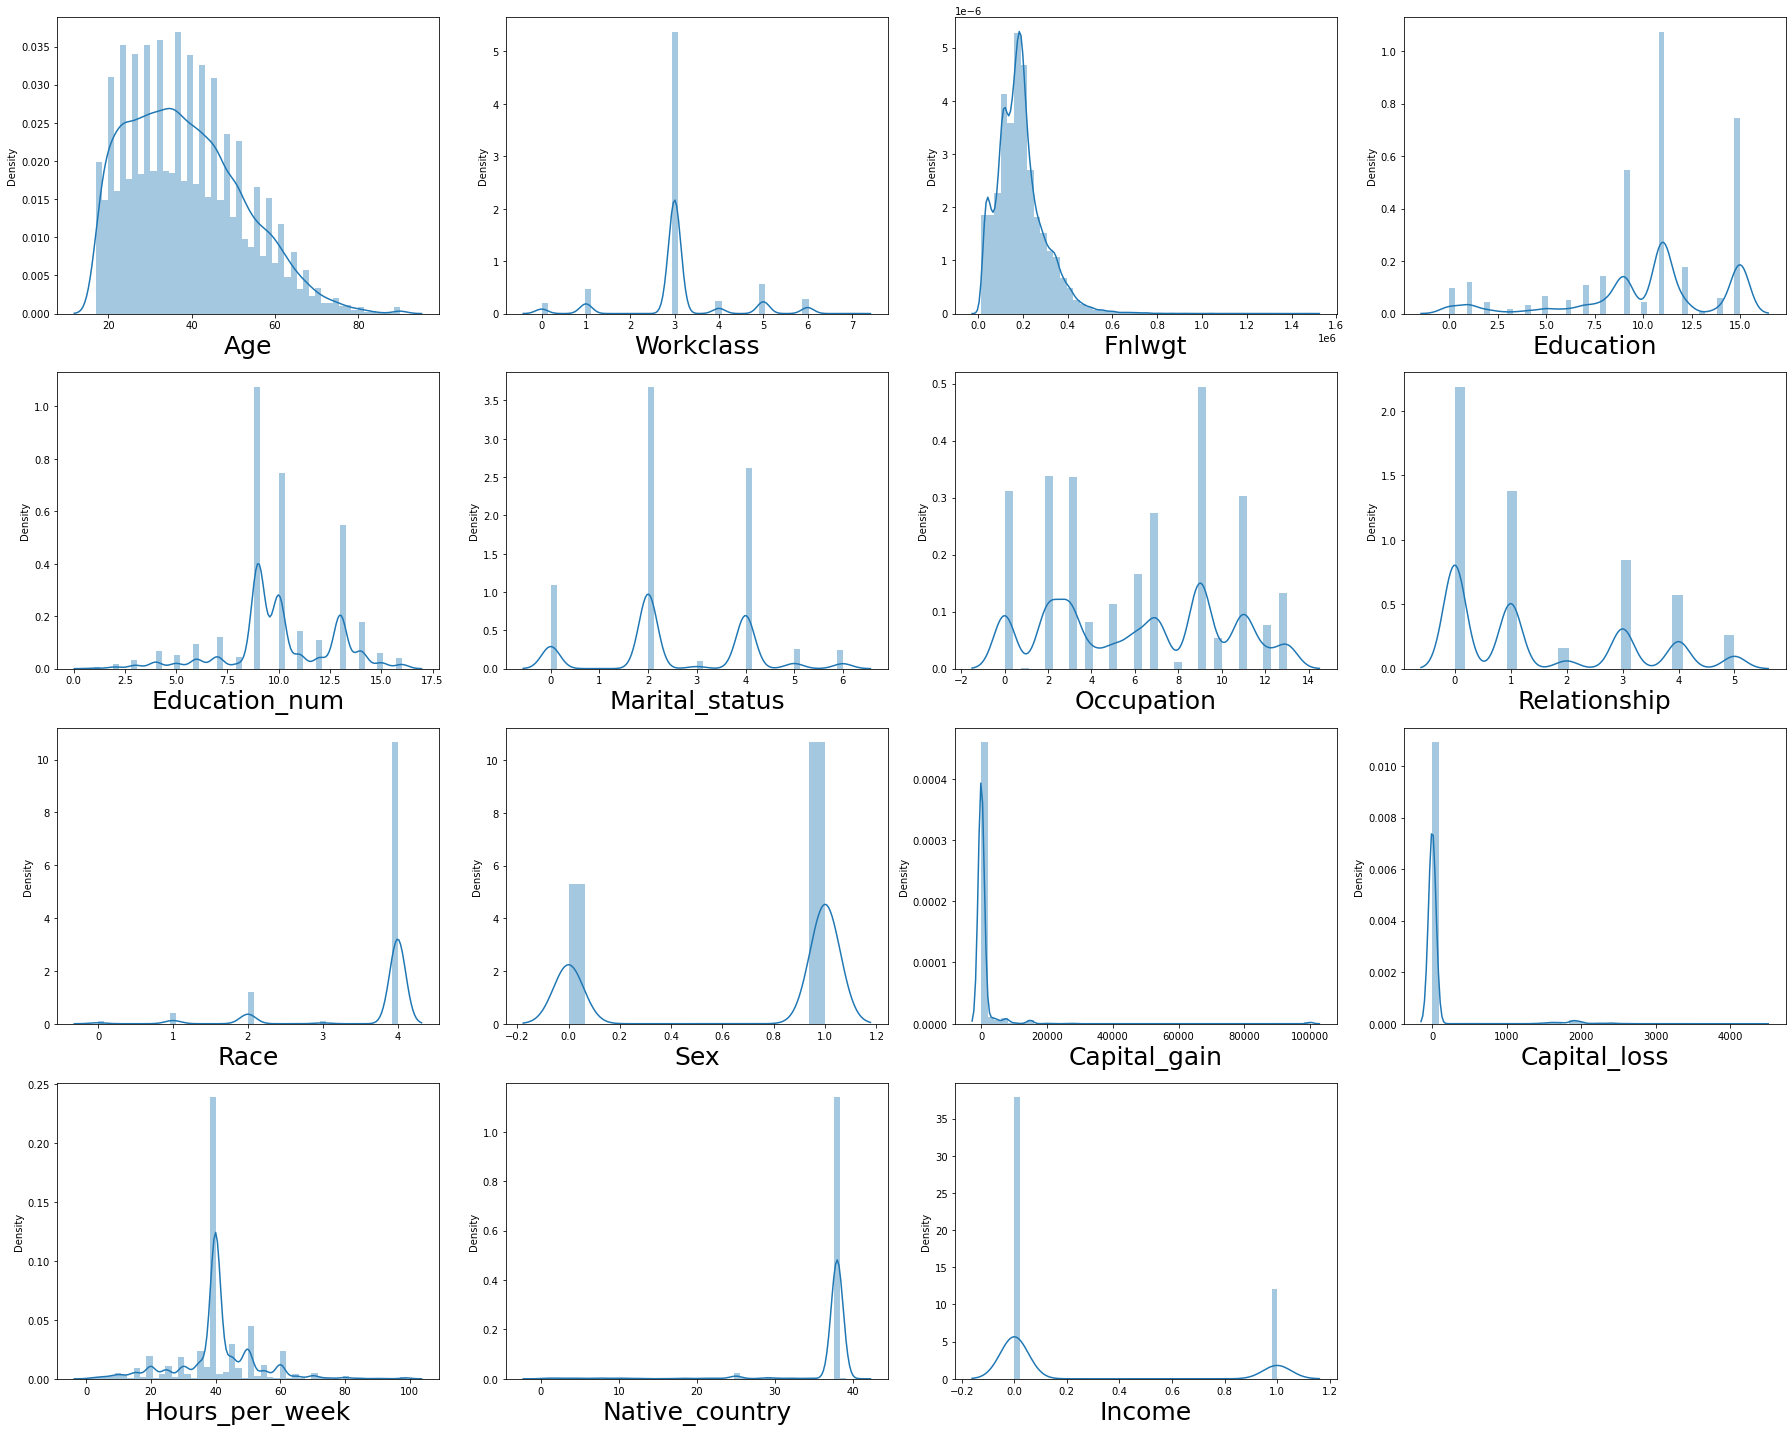

In [69]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

****After replacing categorical columns to numerical values I use Distribution Plot to find the Skewness in this Dataset.****

## Replacing all the zero values from different columns

In [70]:
# Replacing categorial columns with mode
df['Workclass']=df['Workclass'].replace(0,df['Workclass'].mode()[0])
df['Education']=df['Education'].replace(0,df['Education'].mode()[0])
df['Marital_status']=df['Marital_status'].replace(0,df['Marital_status'].mode()[0])
df['Occupation']=df['Occupation'].replace(0,df['Occupation'].mode()[0])
df['Relationship']=df['Relationship'].replace(0,df['Relationship'].mode()[0])
df['Race']=df['Race'].replace(0,df['Race'].mode()[0])
df['Native_country']=df['Native_country'].replace(0,df['Native_country'].mode()[0])
df['Income']=df['Income'].replace(0,df['Income'].mode()[0])

 ****According to the Dataset these 8 columns (Workclass,Education,Marital_status,Occupation,Relationship,Race,Native_country,Income) 
 have zero values which i have replace it.****

## Box Plot

Age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Workclass          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fnlwgt             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education_num        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Marital_status    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Occupation        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Relationship      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Race                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
Sex               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Capital_gain      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Capital_loss      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Hours_per_week          AxesSubplot(0.125,0.125;0.168478x0.16413)
Native_country       AxesSubplot(0.327174,0.125;0.168478x0.16413)
Income               AxesSubplot(0.529348,0.125;0.168478x0.16413)
dtype: obj

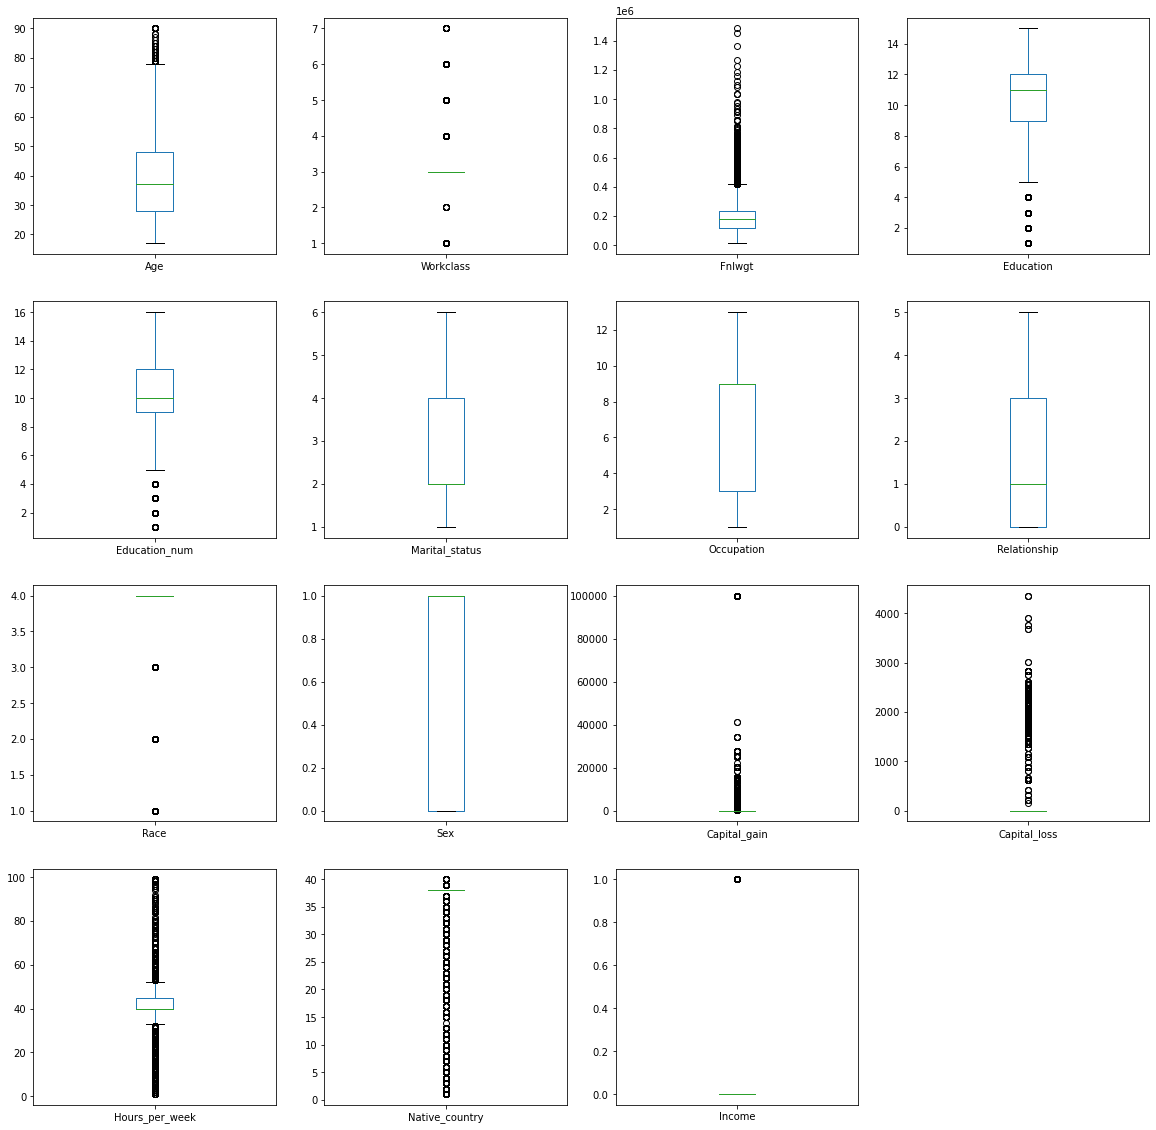

In [71]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

## Z score

In [72]:
z_score = zscore(df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week','Native_country']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000,28994.000000
mean,38.156412,3.174553,185023.203490,10.631544,10.035042,2.901014,7.185176,1.475857,3.717148,0.661999,569.017383,1.206491,39.897841,37.423053,0.222218
std,13.382662,0.965511,94786.735379,3.454294,2.493010,1.146345,3.359864,1.607994,0.748314,0.473037,2328.770356,32.553739,11.151316,2.658327,0.415744
min,17.000000,1.000000,12285.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,19.000000,0.000000
25%,27.000000,3.000000,117258.000000,9.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,177461.000000,11.000000,10.000000,2.000000,9.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,234193.750000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,79.000000,7.000000,506436.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,77.000000,40.000000,1.000000


In [73]:
df.shape

(28994, 15)

****From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.****

****So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers i have used z score above to remove outliers.****

## Distribution Plot 

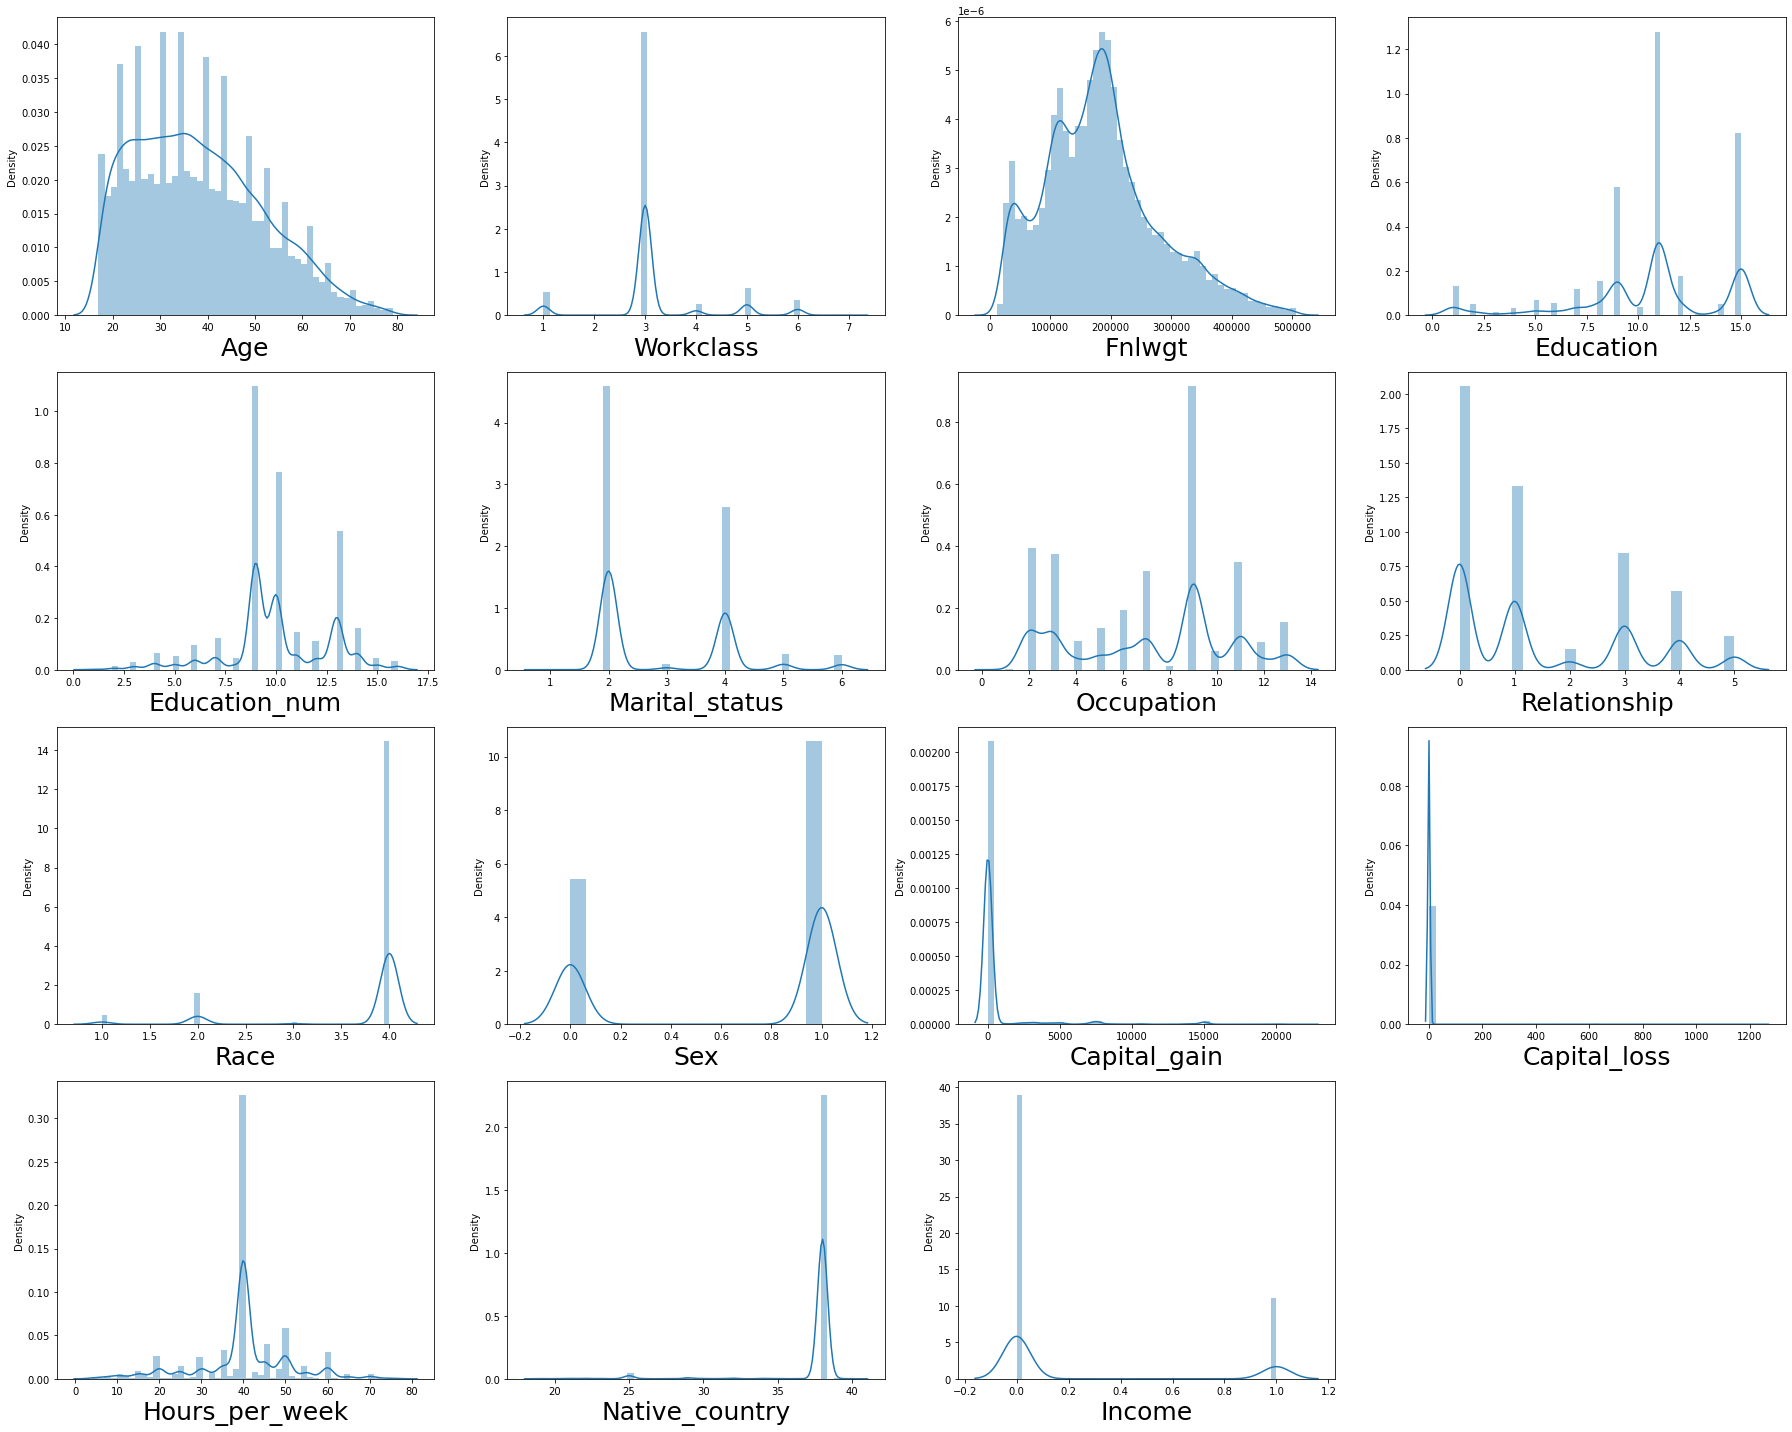

In [74]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

****After Removing Outliers & Skewness I make Distribution Plot to understand how much my data is ready for Model Prediction.****

# Machine Learning

In [75]:
# dividing features and label

x = df.drop('Income',axis=1)
y = df.Income

****Separate response variable and features in x & y.****

## StandardScaler

****The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler.****

****Below I will use the StandardScaler to scale the data.****

In [76]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.88501024,  1.89068677, -1.07308219, ..., -0.03706216,
        -2.41211924,  0.21703764],
       [-0.01168784, -0.18079177,  0.32307606, ..., -0.03706216,
         0.00916132,  0.21703764],
       [ 1.10918476, -0.18079177,  0.52432076, ..., -0.03706216,
         0.00916132,  0.21703764],
       ...,
       [ 1.48280896, -0.18079177, -0.3493503 , ..., -0.03706216,
         0.00916132,  0.21703764],
       [-1.20728527, -0.18079177,  0.17372769, ..., -0.03706216,
        -1.78437983,  0.21703764],
       [ 1.03445992,  0.8549475 ,  1.08565371, ..., -0.03706216,
         0.00916132,  0.21703764]])

****By Using Standard Scaler I have scaled the data in scaled one.****

## VIF - variance inflation factor

In [77]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.167447,Age
1,1.015533,Workclass
2,1.020206,Fnlwgt
3,1.076017,Education
4,1.153503,Education_num
5,1.277280,Marital_status
6,1.049788,Occupation
7,1.706783,Relationship
8,1.040987,Race
9,1.591624,Sex


** By using Variance Inflation Factor(VIF) I can see that there is a no strong relationship among any Features as values are less than 5.** 

## Model Building

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

****Splitting the dataset into the Training set and Test set.****

****The data should be divided into train and test data.****

*****I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data.****

****I can set the random state of the split to ensure consistent results.****

## Logistic Regression

****As here I wan’t to classify between the people who have income more than $50K or not, so I have used Logistic Regression.****

****Here is the code for Logistic Regression****

In [79]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred = log_reg.predict(x_test)

In [81]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5320,  337],
       [ 868,  724]], dtype=int64)

In [82]:
log_reg.score(x_test,y_test)

0.8337701751965788

In [83]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8337701751965788

In [84]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5657
           1       0.68      0.45      0.55      1592

    accuracy                           0.83      7249
   macro avg       0.77      0.70      0.72      7249
weighted avg       0.82      0.83      0.82      7249



### By using Logistic Regression I Get Accuracy Score : 83%.

****After modelling Logistic Regression then my next step is to find Auc Score which will help me to make Roc_Auc Curve.****

****Below is the Auc Score:****

In [85]:
# Logistic Regression
roc_auc_score(y_test,log_reg.predict(x_test))

0.6976008289636266

#### So, I get Auc Score From Logistic Regresion is 69.76%.

## KNN 

#### After using Logistic Regression I use Knn Model to predict the Income.

#### Therefore my first work is to use best feature method selection method which I will use with KNN model.

### Using SelectKBest Method for best features selection

In [86]:
best_features = SelectKBest(score_func=f_classif,k=12)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate Dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(12,'Score'))

     Features_Name        Score
10    Capital_gain  3881.328010
5   Marital_status  3598.113210
4    Education_num  3233.100708
7     Relationship  1869.925953
0              Age  1745.775689
12  Hours_per_week  1642.097414
9              Sex  1329.028679
8             Race   146.427291
3        Education    52.901396
13  Native_country    51.881087
6       Occupation    41.334516
1        Workclass    18.306848


#### So, by using Best Feature Method i can say that 'Capital_gain' is the main source for High Income in USA.
#### After then i will check remainings feilds of documentatation.

In [87]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [88]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5138,  519],
       [ 701,  891]], dtype=int64)

In [89]:
knn.score(x_test,y_test)

0.8317009242654159

In [90]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8317009242654159

In [91]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5657
           1       0.63      0.56      0.59      1592

    accuracy                           0.83      7249
   macro avg       0.76      0.73      0.74      7249
weighted avg       0.83      0.83      0.83      7249



### According to my perception of modelling KNN I got Accuracy Score : 83%.
### But this score can improve the accuracy by using Grid Search CV.

## Let use Grid search CV for the best parameter to improve the accuracy

In [92]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [93]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [94]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [95]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [96]:
# we will use the best parameters in our knn algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=7)

In [97]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [98]:
y_pred = knn.predict(x_test)

In [99]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5162,  495],
       [ 694,  898]], dtype=int64)

In [100]:
knn.score(x_test,y_test)

0.8359773761898193

In [101]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8359773761898193

In [102]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      5657
           1       0.64      0.56      0.60      1592

    accuracy                           0.84      7249
   macro avg       0.76      0.74      0.75      7249
weighted avg       0.83      0.84      0.83      7249



#### By using Grid Search CV I improve the Accuracy Score : 84%

#### After modelling KNN then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [103]:
# KNN 
roc_auc_score(y_test,knn.predict(x_test))

0.7382840710535175

### So, I get Auc Score From KNN is 73.82%

## RandomForestClassifier

#### After using KNN I use RandomForestClassifier to predict the Income.

In [104]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [105]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5247,  410],
       [ 670,  922]], dtype=int64)

In [106]:
rfc.score(x_test,y_test)

0.8510139329562698

In [107]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8510139329562698

In [108]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5657
           1       0.69      0.58      0.63      1592

    accuracy                           0.85      7249
   macro avg       0.79      0.75      0.77      7249
weighted avg       0.84      0.85      0.85      7249



#### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 80%.
#### But this score can improve the accuracy by using Grid Search CV.

## Let use Grid search CV for the best parameter to improve the accuracy

In [109]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 13}


In [110]:
rfc = grd.best_estimator_

In [111]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=10, n_estimators=13)

In [112]:
y_pred = rfc.predict(x_test)

In [113]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5428,  229],
       [ 820,  772]], dtype=int64)

In [114]:
rfc.score(x_test,y_test)

0.8552903848806732

In [115]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8552903848806732

In [116]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5657
           1       0.77      0.48      0.60      1592

    accuracy                           0.86      7249
   macro avg       0.82      0.72      0.75      7249
weighted avg       0.85      0.86      0.84      7249



### By using Grid Search CV I improve the Accuracy Score : 86%

#### After modelling RandomForestClassifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [117]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.7222219014464225

### So, I get Roc Score From RandomForestClassifier is 72.45%

## Decision Tree Classifier

### After using Random Forest Classifier I use Decision Tree Classifier to predict the Income.

In [118]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [119]:
y_pred = log_reg.predict(x_test)

In [120]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5320,  337],
       [ 868,  724]], dtype=int64)

In [121]:
dtc.score(x_test,y_test)

0.8065940129673058

In [122]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8337701751965788

In [123]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5657
           1       0.68      0.45      0.55      1592

    accuracy                           0.83      7249
   macro avg       0.77      0.70      0.72      7249
weighted avg       0.82      0.83      0.82      7249



### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 83%.
### But this score can improve the accuracy by using Grid Search CV.

## Let use Grid search CV for the best parameter to improve the accuracy

In [124]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [125]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [126]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [127]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [128]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=7,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)

In [129]:
y_pred = dtc.predict(x_test)

In [130]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[5409,  248],
       [ 833,  759]], dtype=int64)

In [131]:
dtc.score(x_test,y_test)

0.8508759828941923

In [132]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8508759828941923

In [133]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5657
           1       0.75      0.48      0.58      1592

    accuracy                           0.85      7249
   macro avg       0.81      0.72      0.75      7249
weighted avg       0.84      0.85      0.84      7249



### By using Grid Search CV I improve the Accuracy Score : 85%
#### After modelling Decision Tree Classifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.¶
#### Below is the Auc Score:    

In [134]:
# Decision Tree Classifier
roc_auc_score(y_test,dtc.predict(x_test))

0.7164596515368072

### So, I get Auc Score From Decision Tree Classifier is 71.64%

## Roc_Auc Curve

### In Machine Learning, performance measurement is an essential task.
### So when it comes to a classification problem, I can count on an AUC - ROC Curve.
### When I need to check or visualize the performance of the multi-class classification problem, I use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.
### It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics).¶

In [135]:
from IPython.display import Image
Image(url= "https://www.k2analytics.co.in/wp-content/uploads/2020/08/Classification_Accuracy_Feature_Image.png")

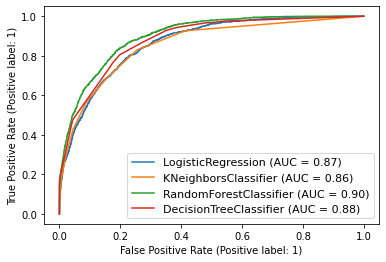

In [136]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

## Summary:
#### ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.¶
#### ROC curves are appropriate when the observations are balanced or not.
#### According to my Roc_Auc Curve I can say that RandomForestClassifier with 90% is the best predictive model in this Dataset.

# Conclusion

### In the modeling Building section, I have seen the hyperparameter tuned Random Forest has the highest Best Score (0.86).

### It can be clearly seen the feature engineering effects on each individual nine model in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above.

### I’ll briefly discuss how I approached this problem of predicting Higher Income Prediction above $50K.
a) I  have census income datastet from which I had to extract information.

b ) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.

c) After from all datasets, I preprocessed the data using imputer function to fill the missing values and replacing all zeros.

d) I did exploratory data analysis on main data frame and tried to remove all the possible outliers.

e) Based on visulization  knowledge, I use various EDA TECHNIQUES to plot the graphs and Z - SCORE.

f) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.

g) After from all these i split the Features & Labels into 2 parts.

h) On this data, I have applied our machine learning models such as logistic regression, Random forest,Decision Tree and KNN.

In [139]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/KtCwOggGwgQ/maxresdefault.jpg")

## Saving the Best Model

In [137]:
import pickle

In [138]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

### From the Above Coding I Get best model Random Forest Accuracy Score.
### So I use Random Forest Classifier to Save the Best Model.